## Exercises

**This homework focuses on training and evaluating prediction models for a particular problem and dataset.**
The data comes from the Residential Property Price Register (RPPR) (https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en). The Residential Property Price Register is produced by the Property Services Regulatory Authority (PSRA). It includes Date of Sale, Price and Address of all residential properties purchased in Ireland since the 1st January 2010, as declared to the Revenue Commissioners for stamp duty purposes. In this analysis, **we focus on using the data collected by RPPR to build and evaluate a data analytics solution for residential property price prediction**. 

The goal in this homework is to work with the data to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature **Price**. For this homework you are asked to use the same dataset allocated to you in Homework1 (you can use your cleaned/prepared CSV from Homework1 or start from the raw dataset, clean it according to concepts covered in the lectures/labs, then use it for training prediction models).
 
There are 5 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 25% shown as [25]. The total that can be achieved is 100.


(1). [25] **Data Understanding and Preparation:** Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.

    - (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside. 
    - (1.2) On the training set:
        - Plot the correlations between all the continuous features (if any). Discuss what you observe in these plots.
        - For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.
        - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.
      
    
(2). [15] **Predictive Modeling and Evaluation:** Linear Regression.  

    - (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above. 
    - (2.2) Can you interpret the linear regression model? Discuss any knowledge you can gain in regard of the working of this model. 
    - (2.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.
    - (2.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.
    
(3). [15] **Predictive Modeling and Evaluation:** Decision Tree.  

    - (3.1) On the training set, train a decision tree model to predict the target feature, using the descriptive features selected in exercise (1) above.   
    - (3.2) Can you interpret the decision tree model? Discuss any knowledge you can gain in regard of the working of this model. 
    - (3.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.
    - (3.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.
    
   
    
(4). [20] **Predictive Modeling and Evaluation:** Random Forest.  

    - (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   
    - (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain in regard of the working of this model.   
    - (4.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.
    - (4.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and to the random forest out-of-sample error and discuss your findings.
    
(5). [25] **Improving Predictive Models.**

    - (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the average price computed from the training set, for the same year as the test example? Justify your answers.
    - (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.
    - (5.3) Take your best model trained and selected based on past data (i.e. your cleaned Homework1 dataset), and evaluate it on the new test dataset provided with this homework (in file '22032022-PPR-Price-recent.csv'). Note that the new test data has to be transformed using the same steps as the past training data, otherwise the trained model cannot be used for prediction on the new data. Discuss your findings.     

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import graphviz
from graphviz import Source

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [142]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',1000)

# (1) Data understanding and prep:

### Summary of data quality plan:
- 1.Date has exceeded the current time, may be a problem when the information is entered, but only within 10, accounting for a very low ratio, so you can do nothing;
- 2. Price has abnormal values: found that there is a normal range of 6 times the maximum value and 4 times the price, decided to filter out the first 5% of the largest price and the first 5% of the smallest.
- 3. address format is not standardized not standard, the last assignment to Address as a parameter to check the Google API, to get the standard format of the address. So here can be deleted;
- 4. Postal Code and Property Size Description have too many missing values, accounting for up to 80 and 89.9 respectively, and the features that generally account for 25% or more of the missing values are not helpful for prediction. The higher the price of the house, the higher the price of the house, and usually the reverse is also true, the higher the price of the house, the larger the house, so here first filter out the outliers of Price, the price is divided into four levels, just corresponding to the four specifications of Property Size Description, and then fill in the missing values;
- 

#### Summary of data quality plan:

| variable Names  |  Data Quality Issue  |  Handling Strategy  |
| ----            | ----                 | ----                |
| DateofSale |  Outliers  |  Do Nothing  |
| Price |  Outliers  |  Drop Top 5% and Bottom 5%  |
| Address |  Not standard  |  Drop  |
| Postal Code |  Too many NAN  |  Drop  |
| Property Size Description |  Too many NAN  |  Fill NA  |


##  1.1 Review, prepare and split the dataset into two datasets: 70% training and 30% test
Here we will import cleaned dataset

In [143]:
df = pd.read_csv("ppr_with_new_features_20211342.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
df.head(5)

,DateofSale,Address,PostalCode,County,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription,lat,lng,address_types,YearMonth
0,2017-3-3,"86 MULLAGHMATT, MONAGHAN",NaN,Monaghan,65000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,54.240643,-6.981199,street_address,201703
1,2020-12-3,"13 FABER GROVE, DUN LAOGHAIRE, DUBLIN",NaN,Dublin,320000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,53.283234,-6.156925,street_address,202012
2,2010-9-7,"32 Allenton Drive, Tallaght",Dublin 24,Dublin,194000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,53.271757,-6.352986,street_address,201009
3,2019-10-29,"15 An Fuaran, Dublin Road, Oranmore",NaN,Galway,345010.0,No,Yes,New Dwelling house /Apartment,NaN,53.269597,-8.925121,street_address,201910
4,2019-11-7,"CHERRYORCHARD, ENNISCORTHY, WEXFORD",NaN,Wexford,172000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,52.506932,-6.587670,route,201911


After importing the cleaned csv with new features, as a reminder we will check the shape, inspect the datatypes and check for any remaining null values

In [144]:
df.shape

(10000, 13)

In [145]:
df.isna().mean()

DateofSale                 0.0000
Address                    0.0000
PostalCode                 0.8082
County                     0.0000
Price                      0.0000
NotFullMarketPrice         0.0000
VATExclusive               0.0000
DescriptionofProperty      0.0000
PropertySizeDescription    0.8978
lat                        0.0000
lng                        0.0000
address_types              0.0217
YearMonth                  0.0000
dtype: float64

In [146]:
df.dtypes

DateofSale                  object
Address                     object
PostalCode                  object
County                      object
Price                      float64
NotFullMarketPrice          object
VATExclusive                object
DescriptionofProperty       object
PropertySizeDescription     object
lat                        float64
lng                        float64
address_types               object
YearMonth                    int64
dtype: object

#### Convert datatypes for plotting later
We will now review the datatypes and convert if needed. This will help avoid plotting errors later in the notebook
- Categorical features:
  -  "PropertySizeDescription" are string values. These will be converted to :
    - "less than 38 sq metres": 1, 
    - "greater than or equal to 38 sq metres and less than 125 sq metres": 2,
    - "greater than or equal to 125 sq metres": 3,
    - "greater than 125 sq metres": 4
  - "DescriptionofProperty" will be mapped 'New Dwelling house /Apartment': 1, "Second-Hand Dwelling house /Apartment": 0, and stored as "int64"
  - "NotFullMarketPrice" and "VATExclusive" will be mapped "Yes": 1, "No": 0
- Some Continuous features are float64 type:
    - ~~lat and lng, lat Multiply by 10 and round up, lng Multiply by 100 and round up~~

In [147]:
# Convert PropertySizeDescription
df["PropertySizeDescription"] = df["PropertySizeDescription"].str.strip()\
    .map({"less than 38 sq metres": 1, 
          "greater than or equal to 38 sq metres and less than 125 sq metres": 2,
          "greater than or equal to 125 sq metres": 3,
          "greater than 125 sq metres": 4
    })
df["PropertySizeDescription"] = df[df.PropertySizeDescription.notnull()]["PropertySizeDescription"].astype('int64')


In [148]:
# 0: New Dwelling house /Apartment, 1: Second-Hand Dwelling house /Apartment
df["DescriptionofProperty"].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [149]:
df["DescriptionofProperty"] = df["DescriptionofProperty"].map({"New Dwelling house /Apartment": 1, 
                                 "Second-Hand Dwelling house /Apartment": 0})

# "NotFullMarketPrice" and "VATExclusive"
df["NotFullMarketPrice"] = df["NotFullMarketPrice"].map({"Yes": 1, "No": 0})
df["VATExclusive"] = df["VATExclusive"].map({"Yes": 1, "No": 0})

#### Deal with NaN values 
NaN values appear in the feature NetFractionInstallBurden will need to be dealt with (removed) before any modeling takes place
- If the percentage of null values exceeds 25%, it is not helpful for model training and can be deleted or filled with special methods.
  - Here PostalCode empty value accounted for 80.82%, and other areas have been richer information, so delete the PostalCode column
  - PropertySizeDescription empty value accounted for 0.8978, but this feature is very important, the larger the general house the higher the price, usually the reverse also holds, the higher the price of the general house is larger, here first deal with Price's abnormal value, and then generate "PriceLevel" from "Price". Price will be converted to quantiles with [.25, .5, .75], then divided into four levels: 1, 2, 3, 4, and stored as "int64", and then fill the null by PriceLevel

In [150]:
df.drop(columns=["PostalCode", ], inplace=True)

#### Handle outliers: filter out the top 5% of the largest price and the top 5% of the smallest. The more outliers, the more it affects the quality of the data.

In [151]:
percent_5 = int(df.shape[0] / 100 * 5)
print(f"""orig max = {df["Price"].max()}, min = {df["Price"].min()}""")
print(f"""orig mean = {df["Price"].mean()}, mode = {df["Price"].mode()[0]}""")
max_percent_5 = df[df.Price.max() > df.Price].sort_values(by=["Price"], ascending=False)["Price"].head(percent_5)
print(f"""top 5% mean = {max_percent_5.mean()}, top 5% min = {max_percent_5.min()}""")
# print(max_percent_5)
min_percent_5 = df[df.Price.min() < df.Price].sort_values(by=["Price"], ascending=False)["Price"].tail(percent_5)
print(f"""Bottom 5% mean = {min_percent_5.mean()}, Bottom 5% min = {min_percent_5.max()}""")

df = df[(df.Price < max_percent_5.min()) & (df.Price > min_percent_5.max())]
print("new mean = ", df.Price.mean())
print(df.shape)

orig max = 60000000.0, min = 5252.0
orig mean = 267581.87241500005, mode = 150000.0
top 5% mean = 1185382.779, top 5% min = 625000.0
Bottom 5% mean = 30199.089439999996, Bottom 5% min = 44444.44
new mean =  223029.18709616445
(8995, 12)


In [152]:
# generate new feature "PriceLevel" to fill na of PropertySizeDescription: from continuous type to Categorical type(4 level)
quantiles = df["Price"].quantile([.25, .5, .75])

def gen_price_level(price):
    if price < quantiles[0.25]:
        return 1
    elif price < quantiles[0.50]:
        return 2
    elif price < quantiles[0.75]:
        return 3
    else:
        return 4

df["PriceLevel"] = df["Price"].apply(lambda x: gen_price_level(x))
print(df["PriceLevel"].max(), df["PriceLevel"].min())

4 1


In [153]:
# by PriceLevel to fill the empty value: PropertySizeDescription empty value accounted for 0.8978, 
# but this information is more important, here choose to fill the empty value by PriceLevel, 
# the larger the house the higher the price, usually the reverse also holds, the higher the price of the general house is larger
df['PropertySizeDescription'] = np.where(df['PropertySizeDescription'].isnull(), df['PriceLevel'], df['PropertySizeDescription'])
df["PropertySizeDescription"] = df["PropertySizeDescription"].astype('int64')
df.drop(columns="PriceLevel", inplace=True)

In [154]:
df.dtypes

DateofSale                  object
Address                     object
County                      object
Price                      float64
NotFullMarketPrice           int64
VATExclusive                 int64
DescriptionofProperty        int64
PropertySizeDescription      int64
lat                        float64
lng                        float64
address_types               object
YearMonth                    int64
dtype: object

Show correlation with the target for each new feature

In [155]:
corr = df[['lat', 'lng',   
           'YearMonth', 'Price']].corr()
corr.sort_values(by="Price", ascending=False)

,lat,lng,YearMonth,Price
Price,0.003422,0.044461,0.190412,1.000000
YearMonth,0.002166,-0.002247,1.000000,0.190412
lng,-0.324545,1.000000,-0.002247,0.044461
lat,1.000000,-0.324545,0.002166,0.003422


Reviewing the correlations above:
1. YearMonth (0.19) - Original & best correlation
2. lat (0.0034) - Closest to original
3. Drop Feature - Lose too much information

Based on this evaluation we will drop 'lat', keep 'YearMonth' and 'lng'

In [156]:
df.drop(columns=["lat"], inplace=True)

The shape resulting, data types and null values can now be seen below

In [157]:
df.shape

(8995, 11)

In [158]:
df.dtypes

DateofSale                  object
Address                     object
County                      object
Price                      float64
NotFullMarketPrice           int64
VATExclusive                 int64
DescriptionofProperty        int64
PropertySizeDescription      int64
lng                        float64
address_types               object
YearMonth                    int64
dtype: object

In [159]:
df.isna().mean()

DateofSale                 0.000000
Address                    0.000000
County                     0.000000
Price                      0.000000
NotFullMarketPrice         0.000000
VATExclusive               0.000000
DescriptionofProperty      0.000000
PropertySizeDescription    0.000000
lng                        0.000000
address_types              0.021568
YearMonth                  0.000000
dtype: float64

#### Setup Column types 
We will now setup the continuous, categorical, target features.

##### Select all categorical columns and convert to categorical type
 - This will be needed later when it will be required to convert categorical features into dummy features for modeling

In [160]:
# Select columns containing categorical data, exclude: "DateofSale", "Address",
categorical_columns = df[["County", ]].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

df[categorical_columns].dtypes

County    category
dtype: object

##### Setup continuous columns as all the remaining columns that are not category i.e. they are int64 and float64

In [161]:
# X exclude the target feature PriceLevel
continuous_columns = df.drop(columns="Price").select_dtypes(['int64', 'float64']).columns
df[continuous_columns].dtypes

NotFullMarketPrice           int64
VATExclusive                 int64
DescriptionofProperty        int64
PropertySizeDescription      int64
lng                        float64
YearMonth                    int64
dtype: object

Current status of data types

In [162]:
df.dtypes

DateofSale                   object
Address                      object
County                     category
Price                       float64
NotFullMarketPrice            int64
VATExclusive                  int64
DescriptionofProperty         int64
PropertySizeDescription       int64
lng                         float64
address_types                object
YearMonth                     int64
dtype: object

##### The dataset will now be split into two datasets: 70% training and 30% test
- First we will set the target feature "y" to be Price
- Then we will set "X" to be the remaining features in the dataframe i.e. we drop "Price" from the dataframe

In [163]:
target = "Price"

In [164]:
y = pd.DataFrame(df[target])
X = df.drop([target],1)

##### The data set can now be split
- The train test split will randomly split the dataset as per the test size
- We will set the random state=1 to allow the random shuffle to be repeated within this notebook only

In [165]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  8995
training range (70%):	 rows 0 to 6296
test range (30%): 	 rows 6296 to 8995


## 1.2 On the training set we will now carry out a series of plots comparing all features to help make decisions on what features to keep for the model 

- All plots will be using the training subset of dataset: X_train, y_train

### 1.2.1 Plot the correlations between all the continuous features. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

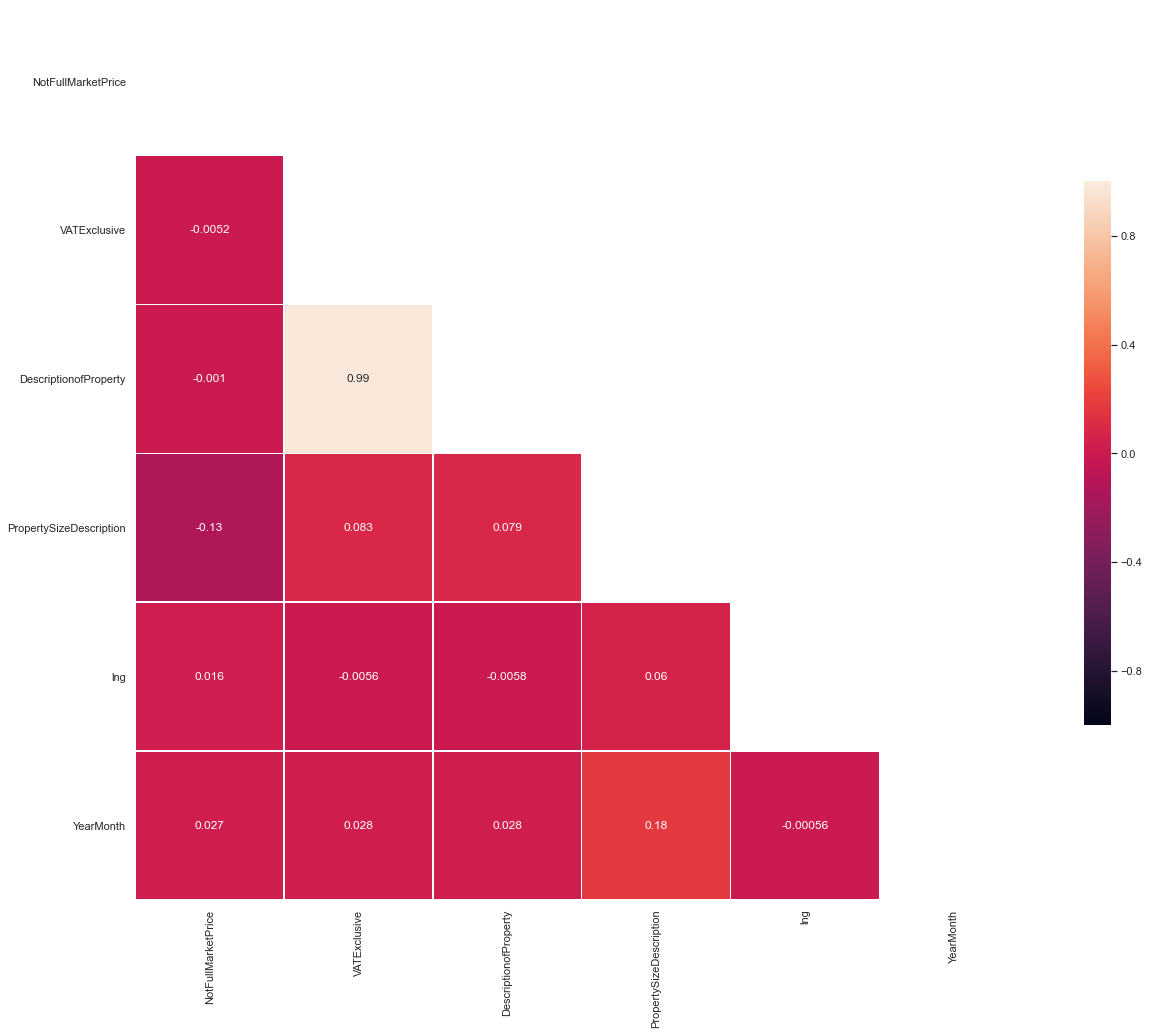

In [166]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

#### Interpretation of the results
- It is found that the correlation between all continuous variables is low except for VATExclusive which is highly positively correlated with DescriptionofProperty, indicating that their information gain is relatively high
- VATExclusive is highly positively correlated with DescriptionofProperty, which is easy to understand, new houses do not need to pay VAT, and only second-hand houses need VAT, so these two characteristics are equivalent, and the DescriptionofProperty column is deleted here

In [167]:
low_information_gain = ["DescriptionofProperty"]

### 1.2.2 Plot interaction between continuous features and target feature
- Here we will loop over each continuous feature and make a scatter plot against the target 'Price'
- We will discuss what we observe from these plots, e.g. which continuous features seem to be better at predicting the target feature
- We will choose a subset of continuous features we find promising (if any) and justify our choice.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

,Price
PropertySizeDescription,0.847115
YearMonth,0.187749
VATExclusive,0.111322
DescriptionofProperty,0.108022
lng,0.059498
NotFullMarketPrice,-0.120393


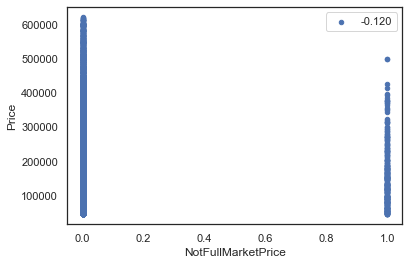

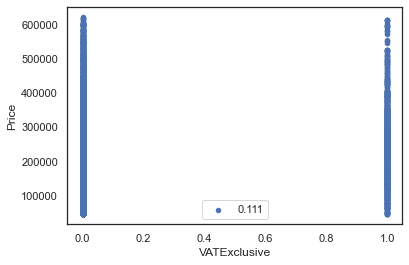

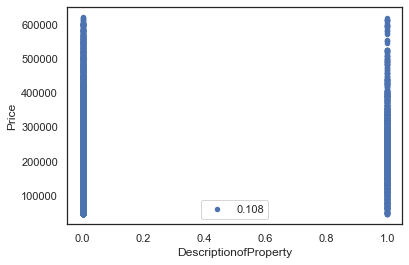

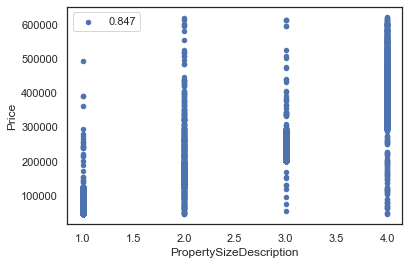

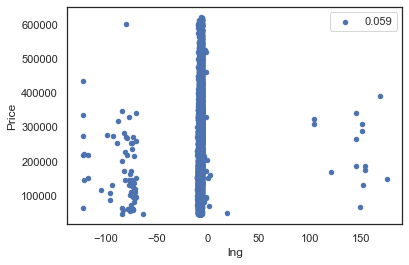

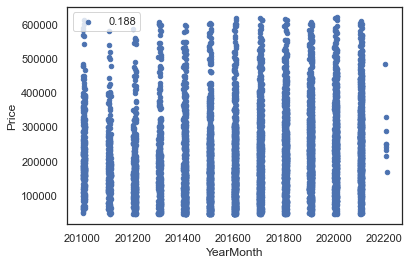

In [168]:
# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all continuous features and target
for column in X_train[continuous_columns]:
    # create temp df to merge column and target
    df_temp = pd.concat([X_train[column], y_train], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, target]].corr().values[0,1]
    # plot the column and tartget feature
    df_temp.plot(kind='scatter', x=column, y=target, label="%.3f" % correlation)
    # add correlation to dict
    corr_dict[column] = correlation

# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=[target]).sort_values(target, ascending=False)
corr_df

#### 1.2.3 Interpretation of the results
- Observing the plots, visually there are no clearly defined correlations and this is probably to be expected with a complex problem like this. There are many interactions to take into account.
- Reviewing the sorted correlation dataframe we get a better overview of all the correlations. 
- We will breakdown the correlation values into 3 bins for purposes of interpretation taking only their absolute value into account
- Note: The bounds for each bin are arbitrary and for the purpose of splitting up the features only. 


| Low correlation | High correlation |
|-----------------|--------------------|
| x <= 0.05      | x > 0.05         |
| 0 features      | 6  features        |
| 0%             | 100%                |

- The strongest correlations are "PropertySizeDescription", "YearMonth" and "lng".
    - YearMonth makes sense here as : There will be different economic environments and policies in different periods, and prices will be affected accordingly
    - lng also seems like a good predictor. Property prices are most affected by location. 
- I will decide to keep the features that fall into the high correlation bins. The low correlations values will likely have little effect on the outcome and make the model more complicated.
- The impact of this decision will be evaluated in part 5.

List of low correlation features

In [169]:
# generate list of features for low correlation bin
low_correlation_features = []
for key, value in corr_dict.items():
    if value <= 0.05 and value >= -0.05:
        low_correlation_features.append(key)
low_correlation_features

[]

In [170]:
# generate list of features for high correlation bin
high_correlation_features = []
for key, value in corr_dict.items():
    if value > 0.05 or value < -0.05:
        high_correlation_features.append(key)
high_correlation_features

['NotFullMarketPrice',
 'VATExclusive',
 'DescriptionofProperty',
 'PropertySizeDescription',
 'lng',
 'YearMonth']

### 1.2.3 Plot interaction between categorical features and target feature
- Here we will plot a pairwise interaction between each categorical feature against the target feature. 

##### Create stacked bar plots for all categorical features


 County


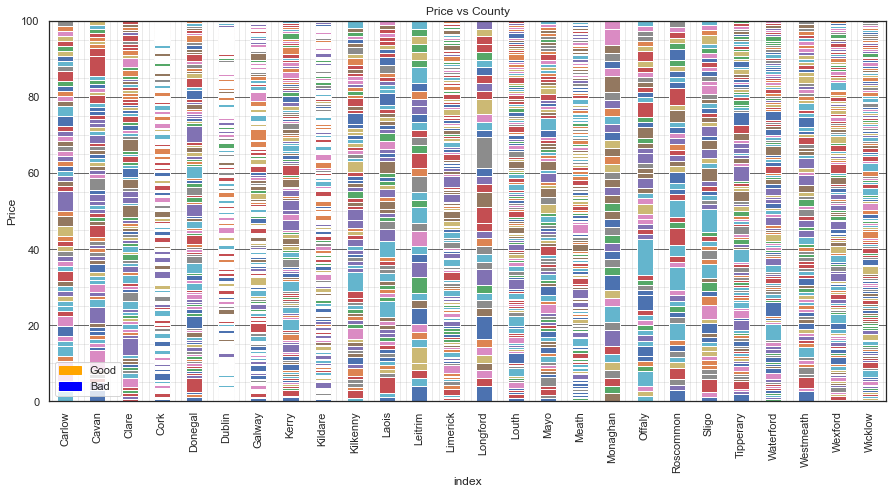

In [171]:
# for the comparison we will convert the target back to categorical
y_train = y_train.astype("category")
#X_train[categorical_columns].columns

# we will create temp dataframe for these plots, mergeing X_train and y_train
df_temp= pd.concat([X_train, y_train], axis=1)


# for each categorical feature create a stacked bar plot
for categorical_feature in categorical_columns:
    # Using code from the module lab
    
    maxDelqEver = pd.unique(df_temp[categorical_feature].ravel())

    # add new column and set values to zero
    df_temp['percent'] = 0

    #print header
    print("\n", categorical_feature)
    # print("Index \t Count")

    # for each category
    for i in maxDelqEver:

        count = df_temp[df_temp[categorical_feature] == i].count()[target]
        count_percentage = (1 / count) * 100

        # print out index vs count
        # print(i, "\t", count)

        index_list = df_temp[df_temp[categorical_feature] == i].index.tolist()
        for ind in index_list:
            df_temp.loc[ind, 'percent'] = count_percentage

    group = df_temp[['percent',categorical_feature,target]].groupby([categorical_feature,target]).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f"{target} vs {categorical_feature}", figsize=(15,7), grid=True)

    # add legend
    red_patch = mpatches.Patch(color='orange', label='Good')
    blue_patch = mpatches.Patch(color='blue', label='Bad')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # add gridlines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # add labels
    my_plot.set_xlabel("index")
    my_plot.set_ylabel(f"{target}")
    my_plot.set_ylim([0,100])
    
# drop 'percent' that was used only for stacked bar plot
df_temp = df_temp.drop("percent", 1)

### 1.2.4 Summary & Drop Features

1. From Continuous vs Target plots (1.2.2) we identified the following to be dropped

In [33]:
low_correlation_features

[]

1. There are equivalent feature pairs in the dataset, for example, YearMonth is calculated from DateofSale, Address has too many non-standardized and non-uniform values, so remove Address and DateofSale

In [34]:
low_information_gain = low_information_gain + ["DateofSale", "Address"]

In [35]:
# drop all low correlation features
low_value_features = list(set(low_information_gain + low_correlation_features))
# before dropping make copy of original
df_rev1 = df.copy()
# drop low value features
df_rev1.drop(low_value_features, 1, inplace=True)
print('\nRemaining columns:', df_rev1.columns)
print('\nNew shape:', df_rev1.shape)


Remaining columns: Index(['County', 'Price', 'NotFullMarketPrice', 'VATExclusive', 'PropertySizeDescription', 'lng', 'address_types', 'YearMonth'], dtype='object')

New shape: (8995, 8)


## 1.3 Prepare dataset for modeling
Now we have picked our descriptive features for the whole dataset, a number of additional steps will need to be taken to prepare the dataset for modeling 
- We will now convert the categorical variables into dummies variable to allow modeling
- We will then remove the redundant dummies which contain no additional information
- We will then set up the train test split again based on the dataset with the dummies included

#### Set up dummy features. 
This will split up each categorical feature into a number of dummy features. The data type changes to "uint8"

In [36]:
# set up dummies features
df_rev1 = pd.get_dummies(df_rev1)
df_rev1.dtypes

Price                           float64
NotFullMarketPrice                int64
VATExclusive                      int64
PropertySizeDescription           int64
lng                             float64
                                 ...   
address_types_postal_town         uint8
address_types_premise             uint8
address_types_route               uint8
address_types_street_address      uint8
address_types_subpremise          uint8
Length: 87, dtype: object

#### Continuous columns are:

In [37]:
# remove the target
continuous_columns = df_rev1.drop(columns=target).select_dtypes(include=['int64', 'float64']).columns.tolist()
continuous_columns

['NotFullMarketPrice',
 'VATExclusive',
 'PropertySizeDescription',
 'lng',
 'YearMonth']

#### Categorical columns are:

In [38]:
categorical_columns = df_rev1.select_dtypes(include=['uint8']).columns.tolist()
categorical_columns

['County_Carlow',
 'County_Cavan',
 'County_Clare',
 'County_Cork',
 'County_Donegal',
 'County_Dublin',
 'County_Galway',
 'County_Kerry',
 'County_Kildare',
 'County_Kilkenny',
 'County_Laois',
 'County_Leitrim',
 'County_Limerick',
 'County_Longford',
 'County_Louth',
 'County_Mayo',
 'County_Meath',
 'County_Monaghan',
 'County_Offaly',
 'County_Roscommon',
 'County_Sligo',
 'County_Tipperary',
 'County_Waterford',
 'County_Westmeath',
 'County_Wexford',
 'County_Wicklow',
 'address_types_administrative_area_level_1-political',
 'address_types_administrative_area_level_2-political',
 'address_types_amusement_park-establishment-park-point_of_interest-tourist_attraction',
 'address_types_art_gallery-establishment-point_of_interest',
 'address_types_bar-cafe-establishment-food-point_of_interest-restaurant-store',
 'address_types_bar-establishment-food-lodging-point_of_interest-restaurant',
 'address_types_bar-establishment-food-point_of_interest-restaurant',
 'address_types_bus_statio

#### Total features are:

In [39]:
features = continuous_columns + categorical_columns
features

['NotFullMarketPrice',
 'VATExclusive',
 'PropertySizeDescription',
 'lng',
 'YearMonth',
 'County_Carlow',
 'County_Cavan',
 'County_Clare',
 'County_Cork',
 'County_Donegal',
 'County_Dublin',
 'County_Galway',
 'County_Kerry',
 'County_Kildare',
 'County_Kilkenny',
 'County_Laois',
 'County_Leitrim',
 'County_Limerick',
 'County_Longford',
 'County_Louth',
 'County_Mayo',
 'County_Meath',
 'County_Monaghan',
 'County_Offaly',
 'County_Roscommon',
 'County_Sligo',
 'County_Tipperary',
 'County_Waterford',
 'County_Westmeath',
 'County_Wexford',
 'County_Wicklow',
 'address_types_administrative_area_level_1-political',
 'address_types_administrative_area_level_2-political',
 'address_types_amusement_park-establishment-park-point_of_interest-tourist_attraction',
 'address_types_art_gallery-establishment-point_of_interest',
 'address_types_bar-cafe-establishment-food-point_of_interest-restaurant-store',
 'address_types_bar-establishment-food-lodging-point_of_interest-restaurant',
 'addr

In [40]:
# normalize features
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
# mapper = DataFrameMapper([(df_rev1[features].columns, StandardScaler())])
# scaled_features = mapper.fit_transform(df_rev1[features].copy())
# scaled_features_df_rev1 = pd.DataFrame(scaled_features, index=df_rev1.index, columns=df_rev1[features].columns)


mapper = DataFrameMapper([(df_rev1.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df_rev1.copy())
scaled_features_df_rev1 = pd.DataFrame(scaled_features, index=df_rev1.index, columns=df_rev1.columns)

### Setting up the train/test split
- This is based on the dataset with dummy values
- The Target is stored in dataframe "y"
- The remaining features are stored in dataframe "X"
- Both are split into training and test subsets

In [41]:
# # y is the target
# y = df_rev1[target] # scaled_features_df_rev1[target]
# # X is everything else
# X = scaled_features_df_rev1.drop([target],1) # scaled_features_df_rev1.copy() # scaled_features_df_rev1.drop([target],1)
# # Split the dataset into two datasets: 70% training and 30% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

# y is the target
y = df_rev1[target]
# X is everything else
X = df_rev1[features]
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ", df_rev1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  8995
training range (70%):	 rows 0 to 6296
test range (30%): 	 rows 6296 to 8995


In [42]:
print("\nDescriptive features in X:\n", X_train.head(1))
print("\nTarget feature in y:\n", y_train.head(1))


Descriptive features in X:
       NotFullMarketPrice  VATExclusive  PropertySizeDescription       lng  YearMonth  County_Carlow  County_Cavan  County_Clare  County_Cork  County_Donegal  County_Dublin  County_Galway  County_Kerry  County_Kildare  County_Kilkenny  County_Laois  County_Leitrim  County_Limerick  County_Longford  County_Louth  County_Mayo  County_Meath  County_Monaghan  County_Offaly  County_Roscommon  County_Sligo  County_Tipperary  County_Waterford  County_Westmeath  County_Wexford  County_Wicklow  address_types_administrative_area_level_1-political  address_types_administrative_area_level_2-political  address_types_amusement_park-establishment-park-point_of_interest-tourist_attraction  address_types_art_gallery-establishment-point_of_interest  address_types_bar-cafe-establishment-food-point_of_interest-restaurant-store  address_types_bar-establishment-food-lodging-point_of_interest-restaurant  address_types_bar-establishment-food-point_of_interest-restaurant  \
2418    

#### Reset the indexes of the training and test splits
- We can see from the X_train printout below that the indexes are no longer consecutive
- This is the same for y_train, X_test, y_test
- This will need to be dealt with next as it will effect merging of dataframes in the coming sections

In [43]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,NotFullMarketPrice,VATExclusive,PropertySizeDescription,lng,YearMonth,County_Carlow,County_Cavan,County_Clare,County_Cork,County_Donegal,County_Dublin,County_Galway,County_Kerry,County_Kildare,County_Kilkenny,County_Laois,County_Leitrim,County_Limerick,County_Longford,County_Louth,County_Mayo,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow,address_types_administrative_area_level_1-political,address_types_administrative_area_level_2-political,address_types_amusement_park-establishment-park-point_of_interest-tourist_attraction,address_types_art_gallery-establishment-point_of_interest,address_types_bar-cafe-establishment-food-point_of_interest-restaurant-store,address_types_bar-establishment-food-lodging-point_of_interest-restaurant,address_types_bar-establishment-food-point_of_interest-restaurant,address_types_bus_station-establishment-point_of_interest-transit_station,address_types_cafe-establishment-food-point_of_interest,address_types_campground-establishment-lodging-park-point_of_interest,address_types_campground-establishment-lodging-park-point_of_interest-rv_park,address_types_cemetery-establishment-park-point_of_interest,address_types_church-establishment-place_of_worship-point_of_interest,address_types_clothing_store-establishment-point_of_interest-store,address_types_colloquial_area-political,address_types_department_store-establishment-point_of_interest-store,address_types_establishment-food-lodging-point_of_interest-restaurant,address_types_establishment-food-lodging-point_of_interest-restaurant-spa,address_types_establishment-food-lodging-point_of_interest-restaurant-spa-store,address_types_establishment-food-meal_delivery-meal_takeaway-point_of_interest-restaurant,address_types_establishment-food-point_of_interest-restaurant,address_types_establishment-general_contractor-point_of_interest,address_types_establishment-health-hospital-point_of_interest,address_types_establishment-health-lodging-point_of_interest,address_types_establishment-health-point_of_interest,address_types_establishment-jewelry_store-point_of_interest-store,address_types_establishment-light_rail_station-point_of_interest-transit_station,address_types_establishment-local_government_office-point_of_interest,address_types_establishment-lodging-point_of_interest,address_types_establishment-lodging-point_of_interest-rv_park,address_types_establishment-lodging-point_of_interest-shopping_mall,address_types_establishment-museum-point_of_interest-tourist_attraction,address_types_establishment-natural_feature,address_types_establishment-park-point_of_interest,address_types_establishment-parking-point_of_interest,address_types_establishment-point_of_interest,address_types_establishment-point_of_interest-primary_school-school,address_types_establishment-point_of_interest-real_estate_agency,address_types_establishment-point_of_interest-school,address_types_establishment-point_of_interest-school-university,address_types_establishment-point_of_interest-shopping_mall,address_types_establishment-point_of_interest-store,address_types_establishment-point_of_interest-tourist_attraction,address_types_establishment-point_of_interest-train_station-transit_station,address_types_establishment-point_of_interest-transit_station,address_types_establishment-premise,address_types_intersection,address_types_locality-political,address_types_neighborhood-political,address_types_political-sublocality-sublocality_level_1,address_types_postal_town,address_types_premise,address_types_route,address_types_street_address,address_types_subpremise
0,0,0,1,-6.378276,202107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,2,-8.620254,201807,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

The datasets are now ready for modeling

## (2) Linear Regression Model
#### 2.1 Train a linear regression model using only the descriptive features selected from part 1 above

In [44]:
%%time
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression(normalize=True).fit(X_train, y_train)

Wall time: 106 ms


#### 2.2 Print out the coefficients learned by the model

In [45]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_linreg.coef_)))


Features are: 
 Index(['NotFullMarketPrice', 'VATExclusive', 'PropertySizeDescription', 'lng', 'YearMonth', 'County_Carlow', 'County_Cavan', 'County_Clare', 'County_Cork', 'County_Donegal', 'County_Dublin', 'County_Galway', 'County_Kerry', 'County_Kildare', 'County_Kilkenny', 'County_Laois', 'County_Leitrim', 'County_Limerick', 'County_Longford', 'County_Louth', 'County_Mayo', 'County_Meath', 'County_Monaghan', 'County_Offaly', 'County_Roscommon', 'County_Sligo', 'County_Tipperary', 'County_Waterford', 'County_Westmeath', 'County_Wexford', 'County_Wicklow', 'address_types_administrative_area_level_1-political', 'address_types_administrative_area_level_2-political', 'address_types_amusement_park-establishment-park-point_of_interest-tourist_attraction', 'address_types_art_gallery-establishment-point_of_interest', 'address_types_bar-cafe-establishment-food-point_of_interest-restaurant-store', 'address_types_bar-establishment-food-lodging-point_of_interest-restaurant',
       'address_typ

#### 2.3 Interpreting the linear regression model

- Linear regression is a modeling tool that is used to make predictions based on linear relationship between the target (dependent variable) and any number of predictors (independent variables)
    - It finds the line of best fit the describes the relationship between the target and predictors 
    - This line is calculated by minimising the overall error
- The linear regression formula takes the following form:
    - $target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n $
    - The output of this formula will be a continuous value that can be less than 0 and higher than 1
- We can see the calculated intercept is -6.070124789670193e+17 (w_0)
    - This is the starting point. i.e. if all other coefficients are zero then the model result will be -6.070124789670193e+17
    - Can be thought of as where the model line intercepts the y axis
- We can see all the coefficients for each feature
    - These are zipped together in a single list for ease of inspection.
    - The sum of all the feature*coefficients + intercept will result in the model prediction  

#### 2.4 Printing 10 predicted target features and evaluate the prediction
- Here we will print the predicted target feature value for the first 10 training examples. 
- We will round the predicted target feature value given by the linear regression model, to get the predicted class for each example. 

In [46]:
multiple_linreg_predictions_train = multiple_linreg.predict(X_train).round(2) # (multiple_linreg.predict(X_train) >= 0.5) * 1.0
# multiple_linreg_predictions_train = multiple_linreg_predictions_train.astype('int64')

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

       Price  Predicted
0  100000.00   134784.0
1  130000.00   162944.0
2  263777.54   217984.0
3  190308.00   186368.0
4  275000.00   249472.0
5   92500.00    64000.0
6  300000.00   356736.0
7  395000.00   387072.0
8  156000.00   139392.0
9  105000.00    85120.0


In [47]:
multiple_linreg_predictions_test = multiple_linreg.predict(X_test).round(2) # (multiple_linreg.predict(X_train) >= 0.5) * 1.0
# multiple_linreg_predictions_test = multiple_linreg_predictions_test.astype('int64')

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

       Price  Predicted
0  445000.00   332160.0
1   82000.00    63360.0
2  190000.00   213504.0
3   77000.00    67200.0
4  259200.71   300160.0
5  144000.00   176768.0
6  255000.00   246528.0
7  193000.00   166784.0
8  150000.00    77952.0
9  136000.00   153216.0


#### 2.5 Evaluation metrics based on training data and test data
- We will print the classification evaluation measures computed on the data set (e.g. Mean absolute error, R2)
- We will discuss findings based on these measures

In [48]:
# Some more evaluation metrics.
def evaluate_regressor(y_true, y_pred):
    print("==================== evaluate regressor =======================")
    print("Mean absolute error: ", metrics.mean_absolute_error(y_true, y_pred))
    print("Mean squared error: ", metrics.mean_squared_error(y_true, y_pred))
    print("R2: ", metrics.r2_score(y_true, y_pred))
    print("======================================================")

In [49]:
def evaluate_classification(y_true, y_pred):
    print("==================== evaluate regressor =======================")
    print("Accuracy: ", metrics.accuracy_score(y_true, y_pred))
    print("Confusion matrix: \n", metrics.confusion_matrix(y_true, y_pred))
    print("Classification report:\n ", metrics.classification_report(y_true, y_pred))
    print("======================================================")

In [50]:
evaluate_regressor(y_train, multiple_linreg_predictions_train)

==================== evaluate regressor =======================
Mean absolute error:  42375.889243964426
Mean squared error:  3963039142.1946487
R2:  0.7468401415353675


In [51]:
evaluate_regressor(y_test, multiple_linreg_predictions_test)

==================== evaluate regressor =======================
Mean absolute error:  6255046831578936.0
Mean squared error:  2.2235557996394696e+34
R2:  -1.425806396945729e+24


##### Interpretation of results
- Todo 
- Negative R2 values for the test set indicate that perhaps this is nonlinear and that fitting by least squares OLS is not appropriate: https://zhuanlan.zhihu.com/p/353112893

#### 2.6 Cross validation
- We will now perform cross validation on the linear regression model. 
- Here we perform the same evaluation as above but multiple times
- Each time the data is shuffled so we get a slightly different view of the data for training and testing
- This works well for evaluating on a limited set of data
- We will store the results in a dictionary for later use

First we need to create a function to perform this cross validation. Sklearn does not provide one for linear regression. However it does for logistic and random forests models
- Cross validation Function can be seen below

In [52]:
def k_fold_cross_validation(model, tmp_x=X_train, tmp_y=y_train, k_fold=10, is_regress=True, col_postfix=""):
    results = {}
    metric_list = list()
    # Although MAE, RMSE, MSE and other indicators are always positive, but under the parameter scoring in sklearn, it is a negative number.
    # This is because when sklearn calculates the model evaluation index, it will consider the nature of the index itself, which is an error in itself.
    # So it is divided into a loss of the model by sklearn. In sklearn, all losses are represented by negative numbers,
    # therefore also displayed as a negative number. The real value is actually the number with the minus sign removed.
    if is_regress:
        metric_list=["r2", "neg_mean_absolute_error", ]
    for test_metric in metric_list:
        scores = cross_val_score(model, tmp_x, tmp_y, cv=k_fold, scoring=test_metric)
        results[test_metric] = scores.mean()
    
    rst_df = pd.DataFrame.from_dict(results, orient='index', columns=[f"{model.__class__.__name__}{col_postfix}"])
    print(f'Mean results from {k_fold}-fold cross validation are:')
    # print(rst_df)

    return rst_df

Preform 10 fold cross validation using k_fold_cross_validation function
- Results summarised below

In [53]:
line_all_score_df = k_fold_cross_validation(model=multiple_linreg, tmp_x=X, tmp_y=y)
line_all_score_df

Mean results from 10-fold cross validation are:


,LinearRegression
r2,-3.663692e+24
neg_mean_absolute_error,-5.832197e+15


In [54]:
line_train_score_df = k_fold_cross_validation(model=multiple_linreg, tmp_x=X_train, tmp_y=y_train)
line_train_score_df

Mean results from 10-fold cross validation are:


,LinearRegression
r2,-1.030822e+26
neg_mean_absolute_error,-3.329219e+16


In [55]:
line_test_score_df = k_fold_cross_validation(model=multiple_linreg, tmp_x=X_test, tmp_y=y_test)
line_test_score_df

Mean results from 10-fold cross validation are:


,LinearRegression
r2,-1.063522e+24
neg_mean_absolute_error,-6.195213e+15


#### Results Findings and Interpretation：
- Conclusion: Here the linear regression model is overfitting too much and hence the training score is much higher than the test score. depends on the data.
- Findings: The score for the training set using metrics.r2_score is 0.747, while the score for the test set is -1.425806396945729e+24. And the score for the training set using k-fold cross-validation is similar to the score for the test set, both are very low.
- Explanation: The k-fold cross-validation approach is more reasonable，in the cross_val_score the scores returned are calculated on the test data of each fold and then averaged. In the "metrics.r2_score" part, calculating the scores on the training data, which in most cases will have higher value, because the model has been trained on that data.

## (3) Decision tree Model

####  3.1.1  Train Decision tree
We will train 2 decision trees, with the same test data 
- One with max_depth=3 and the other max_depth=6
- Max depth determines how deep a decision tree can go before it must give an answer

In [56]:
dtr3 = DecisionTreeRegressor(max_depth=3, random_state=1, criterion="squared_error")
dtr6 = DecisionTreeRegressor(max_depth=6, random_state=1, criterion="squared_error")

##### for regression models, encapsulate the training, prediction and evaluation methods, and print the evaluation results

In [57]:
from sklearn.model_selection import GridSearchCV

def get_important_feat(model):
    
    feature_importances = model.best_estimator_.feature_importances_ if hasattr(model, "best_estimator_") else model.feature_importances_

    importance = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
    print("important features : \r\n", importance.sort_values('importance', ascending=False).head(50))
    

In [58]:
def reg_fit_pred_and_evaluate(model, evaluate_test_set=True):
    """
    reg fit predict and evaluate
    @param evaluate_test_set: True, evaluate test set. False, evaluate training set
    """
    model.fit(X_train, y_train)
    if evaluate_test_set:
        y_pred = model.predict(X_test)
        print("R2 Score on test set: {}".format(metrics.r2_score(y_test, y_pred)))
    else:
        y_pred = model.predict(X_train)
        print("R2 Score on training data: {}".format(metrics.r2_score(y_train, y_pred)))

    params_info = model.best_params_ if hasattr(model, "best_params_") else None
    if params_info:
        print("model best param: ", params_info, 
          "\r\nbest score = ", model.best_score_, "\r\ntrain score = ", model.score(X_train, y_train), "\r\ntest score = ", model.score(X_test, y_test))

    get_important_feat(model)

    # plt.title(f'ROC curve for Model ({params_info})')
    # plt.xlabel("False Positive Rate")
    # plt.ylabel('True Positive Rate')
    # plt.show()

    return y_pred

In [59]:
def print_predictions_head10(y_true, y_pred):
    print("\nPredictions head 10: \n")
    actual_vs_predicted = pd.concat([y_true, pd.DataFrame(y_pred, columns=['Predicted'])], axis=1)
    print(actual_vs_predicted.head(10))

In [60]:
dtr3_predictions_test = reg_fit_pred_and_evaluate(dtr3)

R2 Score on test set: 0.7639511414975342
important features : 
                                                                                       feature  importance
2                                                                     PropertySizeDescription    0.951735
4                                                                                   YearMonth    0.022418
1                                                                                VATExclusive    0.021573
3                                                                                         lng    0.004275
0                                                                          NotFullMarketPrice    0.000000
55                                       address_types_establishment-health-point_of_interest    0.000000
63                                                address_types_establishment-natural_feature    0.000000
62                    address_types_establishment-museum-point_of_interest-tourist_attra

In [61]:
dtr6_predictions_train = reg_fit_pred_and_evaluate(dtr6, evaluate_test_set=False)

R2 Score on training data: 0.8307255611617085
important features : 
                                                                              feature  importance
2                                                            PropertySizeDescription    0.883214
4                                                                          YearMonth    0.037560
1                                                                       VATExclusive    0.035013
3                                                                                lng    0.018828
10                                                                     County_Dublin    0.018474
29                                                                    County_Wexford    0.001417
84                                                      address_types_street_address    0.001362
8                                                                        County_Cork    0.001212
0                                                         

In [62]:
dtr6_predictions_test = reg_fit_pred_and_evaluate(dtr6, evaluate_test_set=True)

R2 Score on test set: 0.8089209200095123
important features : 
                                                                              feature  importance
2                                                            PropertySizeDescription    0.883214
4                                                                          YearMonth    0.037560
1                                                                       VATExclusive    0.035013
3                                                                                lng    0.018828
10                                                                     County_Dublin    0.018474
29                                                                    County_Wexford    0.001417
84                                                      address_types_street_address    0.001362
8                                                                        County_Cork    0.001212
0                                                              

####  3.2  Display Decision tree and interpret the result
We will create graph of each tree and store as an image

In [63]:
def export_clf_dot(dt_clf, max_depth):
    dot_file_name = f"visualization/clf/decisiontree_max_depth{max_depth}.dot"
    with open(dot_file_name, 'w') as f1:
        export_graphviz(dt_clf, out_file=dot_file_name, feature_names=X_train.columns.to_list(), class_names=["1", "2", "3", "4"], rounded=True, filled=True)
        
def export_reg_dot(dt_reg, max_depth):
    dot_file_name = f"visualization/reg/decisiontree_max_depth{max_depth}.dot"
    with open(dot_file_name, 'w') as f1:
        export_graphviz(dt_reg, out_file=dot_file_name, feature_names=X_train.columns.to_list(), rounded=True, filled=True)

In [64]:
# create a Graphviz png
export_reg_dot(dtr3, 3)
export_reg_dot(dtr6, 6)

In [65]:
! dot -Tpng visualization/reg/decisiontree_max_depth3.dot -o visualization/reg/DecisionTree3.png
! dot -Tpng visualization/reg/decisiontree_max_depth6.dot -o visualization/reg/DecisionTree6.png

We can see below the decision tree with max_depth=3
- We can see the root is Property Size description at value 3.5 - This splits the data best i.e. has the highest information gain
- For each split the the model selects the next best feature
- This continues until it reaches a leaf node where the data cannot be split anymore
- The output of this is the prediction
- For example:
    - PropertySizedescription = 1 (<= 1.5, smallest) -> VATExclusive = 0 (<= 0.5, second hand) -> Price = 85467.688 (cheap)

![](visualization/reg/DecisionTree3.png)

In [66]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance': dtr6.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
2,PropertySizeDescription,0.883214
4,YearMonth,0.037560
1,VATExclusive,0.035013
3,lng,0.018828
10,County_Dublin,0.018474
...,...,...
38,address_types_bus_station-establishment-point_of_interest-transit_station,0.000000
37,address_types_bar-establishment-food-point_of_interest-restaurant,0.000000
36,address_types_bar-establishment-food-lodging-point_of_interest-restaurant,0.000000
35,address_types_bar-cafe-establishment-food-point_of_interest-restaurant-store,0.000000


We can see from the list above that:
- 1.Whether a house is in Dublin will affect house prices, it's easy to understand, Dublin is the capital of Ireland and houses are generally more expensive there.
- 2.many of the features provide little to no information gain. It is interesting to note that the categorical features are the worst preforming features, especially address_type

#### 3.3 Printing 10 predicted target features and evaluate the prediction 
- Here we will print the predicted target feature value for the first 10 training examples. 

In [67]:
print_predictions_head10(y_true=y_train, y_pred=dtr6_predictions_train)


Predictions head 10: 

       Price      Predicted
0  100000.00   96198.520000
1  130000.00  158622.813300
2  263777.54  309394.199921
3  190308.00  160182.711168
4  275000.00  244317.457500
5   92500.00   87161.199427
6  300000.00  361661.933333
7  395000.00  419635.871770
8  156000.00  158622.813300
9  105000.00   81056.661327


#### 3.4 Evaluation metrics based on training data and test set
- We will print the evaluation measures computed on the training set
- We will discuss finding based on these measures

In [68]:
evaluate_regressor(y_train, dtr6_predictions_train)

==================== evaluate regressor =======================
Mean absolute error:  35070.30641064579
Mean squared error:  2649872025.358643
R2:  0.8307255611617085


In [69]:
evaluate_regressor(y_test, dtr6_predictions_test)

==================== evaluate regressor =======================
Mean absolute error:  36396.75231814465
Mean squared error:  2979892623.660288
R2:  0.8089209200095123


#### k-fold cross validation on original X, y, and training data and test set

In [70]:
dtr6_all_score_df = k_fold_cross_validation(dtr6, X, y)
dtr6_all_score_df

Mean results from 10-fold cross validation are:


,DecisionTreeRegressor
r2,0.807935
neg_mean_absolute_error,-36924.251481


In [71]:
dtr6_train_score_df = k_fold_cross_validation(dtr6, X_train, y_train)
dtr6_train_score_df

Mean results from 10-fold cross validation are:


,DecisionTreeRegressor
r2,0.798435
neg_mean_absolute_error,-37409.077573


In [72]:
dtr6_test_score_df = k_fold_cross_validation(dtr6, X_test, y_test)
dtr6_test_score_df

Mean results from 10-fold cross validation are:


,DecisionTreeRegressor
r2,0.796645
neg_mean_absolute_error,-37397.307064


Interpretation of test results and comparison with training results and original result
- The R2 for the test is lower as we are not testing the model with data it has not see before
- The scores seem reasonable and are in line with the other models test results

### (4) Random Forest

### 4.1 Train a random forest model using only the descriptive features selected from part 1 above 
- A random forest model will now be trained on our test data. 
- We use the RandomForestRegressor() function. 
- The random state will be set to 1 to allow the results to be repeated

In [73]:
# Train RF with 100 trees
rfr = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

### 4.2 Fit, predict and evaluate. Understanding the Random Forest model
We will now fit, make prediction and evaluation by 'reg_fit_pred_and_evaluate' function.
Then try to understand how this random forest model works
- Random Forest 
    - The random forest is made up of a number of decision trees
    - The output of the random forest is base on the majority output of all decision trees combined
    - This gives reliable results but can be hard to interpret
    - The random forest will keep track of the importance of features in terms of information gain
    - This list is the combined result of the 100 decision trees that make up the random forest model
    - This feature ranking will help us in our optimisation process going forward
      - What are the best features to keep?
      - What features can be safely dropped without loosing information?

In [74]:
rfr_pred_train = reg_fit_pred_and_evaluate(rfr, evaluate_test_set=False)

R2 Score on training data: 0.9724901515467032
important features : 
                                                                 feature  importance
2                                               PropertySizeDescription    0.735208
3                                                                   lng    0.091740
4                                                             YearMonth    0.084060
1                                                          VATExclusive    0.031366
10                                                        County_Dublin    0.015213
84                                         address_types_street_address    0.005760
82                                                address_types_premise    0.003492
83                                                  address_types_route    0.002931
8                                                           County_Cork    0.002852
13                                                       County_Kildare    0.002103
66     

In [75]:
rfr_pred_test = reg_fit_pred_and_evaluate(rfr, evaluate_test_set=True)

R2 Score on test set: 0.8121055076291944
important features : 
                                                                 feature  importance
2                                               PropertySizeDescription    0.735208
3                                                                   lng    0.091740
4                                                             YearMonth    0.084060
1                                                          VATExclusive    0.031366
10                                                        County_Dublin    0.015213
84                                         address_types_street_address    0.005760
82                                                address_types_premise    0.003492
83                                                  address_types_route    0.002931
8                                                           County_Cork    0.002852
13                                                       County_Kildare    0.002103
66          

We can see from the list above that:
- 1.Whether a house is in Dublin will affect house prices, it's easy to understand, Dublin is the capital of Ireland and houses are generally more expensive there.
- 2.many of the features provide little to no information gain. It is interesting to note that the categorical features are the worst preforming features, especially address_type. 

#### 4.3 Printing 10 predicted target features and evaluate the prediction 
- Here we will print the predicted target feature value for the first 10 training examples. 

In [76]:
print_predictions_head10(y_train, rfr_pred_train)


Predictions head 10: 

       Price    Predicted
0  100000.00  101381.2115
1  130000.00  137850.0000
2  263777.54  280609.4191
3  190308.00  179668.3419
4  275000.00  256855.0000
5   92500.00   90280.2000
6  300000.00  335968.4300
7  395000.00  439855.0094
8  156000.00  153150.0000
9  105000.00   95700.0000


In [77]:
print_predictions_head10(y_test, rfr_pred_test)


Predictions head 10: 

       Price    Predicted
0  445000.00  445860.0000
1   82000.00   62027.2500
2  190000.00  169738.9427
3   77000.00   69963.4357
4  259200.71  259910.0000
5  144000.00  174001.8950
6  255000.00  258853.8800
7  193000.00  179503.7678
8  150000.00  117920.5242
9  136000.00  159769.7500


#### 4.4 Evaluation metrics based on training data and test set
- We will print the classification evaluation measures computed on the training set
- We will discuss finding based on these measures

In [78]:
evaluate_regressor(y_train, rfr_pred_train)

==================== evaluate regressor =======================
Mean absolute error:  13678.179005180278
Mean squared error:  430647286.9650822
R2:  0.9724901515467032


In [79]:
evaluate_regressor(y_test, rfr_pred_test)

==================== evaluate regressor =======================
Mean absolute error:  36159.3159929462
Mean squared error:  2930228740.215994
R2:  0.8121055076291944


#### k-fold cross validation on original X, y, and training data and test set

In [80]:
rfr_all_score_df = k_fold_cross_validation(rfr, X, y)
rfr_all_score_df

Mean results from 10-fold cross validation are:


,RandomForestRegressor
r2,0.811718
neg_mean_absolute_error,-36258.777792


In [81]:
rfr_train_score_df = k_fold_cross_validation(rfr, X_train, y_train)
rfr_train_score_df

Mean results from 10-fold cross validation are:


,RandomForestRegressor
r2,0.803659
neg_mean_absolute_error,-36938.714513


In [82]:
rfr_test_score_df = k_fold_cross_validation(rfr, X_test, y_test)
rfr_test_score_df

Mean results from 10-fold cross validation are:


,RandomForestRegressor
r2,0.803025
neg_mean_absolute_error,-36909.515277


Interpretation of test results and comparison with training results and original result
- The result of the test set is not necessarily lower, sometimes even higher, and sometimes lower, with randomness

#### Out of bag accuracy
- This is the out of bag error estimate 
- It is an internal error estimate of a random forest as it is being constructed.
- It is used as an additional measure and should be line with the cross validation results
- This is generally expected to be the lowest

In [83]:
rfr.oob_score_

0.8024876495529696

## 5 Improving Predictive Models
### 5.1 Which model of the ones trained above performs better at predicting the target feature? 
- Random Forest Regressor model works best, every metric of RandomForestRegressor is optimal
- Summary of the results so far can be seen below (based on predicting mean price)
- Note these results are for a subset of the original features i.e. In part 1 we dropped many of the low correlation features
    - In part 5.3 we will review the impact to the decisions taken in part 1

In [84]:
all_result_df = pd.concat([line_all_score_df, dtr6_all_score_df, rfr_all_score_df], axis=1)
all_result_df

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
r2,-3.663692e+24,0.807935,0.811718
neg_mean_absolute_error,-5.832197e+15,-36924.251481,-36258.777792


In [85]:
train_result_df = pd.concat([dtr6_train_score_df, rfr_train_score_df], axis=1)
train_result_df

,DecisionTreeRegressor,RandomForestRegressor
r2,0.798435,0.803659
neg_mean_absolute_error,-37409.077573,-36938.714513


In [86]:
test_result_df = pd.concat([dtr6_test_score_df, rfr_test_score_df], axis=1)
test_result_df

,DecisionTreeRegressor,RandomForestRegressor
r2,0.796645,0.803025
neg_mean_absolute_error,-37397.307064,-36909.515277


The result show that the Random Forest model works best, every metric of RandomForestRegressor is optimal

### 5.1.2 Is the model more accurate than a simple model that always predicts the mean price
- We will compare our results above to a simple model which predicts for the mean price

In [87]:
mean_count = y_train[y_train.round(0) == round(y_train.mean(), 0)].count()
mean_count

0

In [88]:
mean_on_train = round(y_train.mean(), 2)

In [89]:
# generate array (length of train dataset)
avg = np.ones(y_train.count()) * mean_on_train
# create dataframe 
df_avg = pd.DataFrame(avg, columns=['prediction'])
# calculate scores of simple predictin vs actual

evaluate_regressor(y_train, df_avg)

==================== evaluate regressor =======================
Mean absolute error:  100370.15866581957
Mean squared error:  15654295140.745235
R2:  0.0


R2 above is 0, for predicting mean the simple model fails completely as expected

### 5.2 Compare Model performance using different feature subsets 
#### 5.2.1 High correlation features only. Because the "address" feature in the original data set will generate many columns after one-hot-enconding, the training efficiency and effect will be very poor, so the original data with all features is not used for comparison here
- We will now repeat the tests using the high correlation features identified in part (1.2.3)
- Again we set up the dataframe but now we use the list of high_correlation_features only

In [90]:
df_highCorr = pd.get_dummies(df)
y = df_highCorr[target]
X_high = df_highCorr[high_correlation_features]
print("Number of features: ", len(X_high.columns))

Number of features:  6


In [92]:
# calculate Linear regression, logistic regression, random forest results again using all features
decisionTreeDF = k_fold_cross_validation(dtr6, X_high, y)
RandomForestDF = k_fold_cross_validation(rfr, X_high, y)
# merge all 3 models into dataframe
ResultsDF_HighCorrFeatures = pd.concat([decisionTreeDF, RandomForestDF], axis=1)
ResultsDF_HighCorrFeatures

Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:


,DecisionTreeRegressor,RandomForestRegressor
r2,0.803978,0.794855
neg_mean_absolute_error,-37192.020385,-37727.407598


### 5.2.2 Comparison of feature set so far

In [94]:
print("\nScores using subset of features: 8 features (5 features dropped - from part 1)")
print("===================================================================")
print(all_result_df)
print("\nScores using high Correlation features only: 6 features")
print("===================================================================")
print(ResultsDF_HighCorrFeatures)


Scores using subset of features: 8 features (5 features dropped - from part 1)
                         LinearRegression  DecisionTreeRegressor  RandomForestRegressor
r2                          -3.663692e+24               0.807935               0.811718
neg_mean_absolute_error     -5.832197e+15          -36924.251481          -36258.777792

Scores using high Correlation features only: 6 features
                         DecisionTreeRegressor  RandomForestRegressor
r2                                    0.803978               0.794855
neg_mean_absolute_error          -37192.020385          -37727.407598


We can see that using only features with high relevance, the training effect decreases, with R2 of RandomForestRegressor dropping roughly 2.5%, while DecisionTreeRegressor has similar results.

#### 5.2.3 Improving The BestModels, Random Forest Regressor Model
We will focus in the random forest model to see what optimization is possible. We will look at the following::
1. Find best performing max_Depth, limits the maximum depth of the tree, if the decision tree grows one more layer, the demand for samples will double, so limiting the depth of the tree can effectively limit overfitting; 
2. Find lowest number estimators while keeping accuracy high- reduce unnecessary estimators as will slow down the model

In [97]:
max_depth_range = range(6, 15, 2)

#### Optimise Max Depth
**Note: This calculation may take some time**

In [98]:
# initialised empty daraframe
rfr_with_max_depth_all_score_df = pd.DataFrame()

for depth in max_depth_range:
    rf_reg_with_max_depth = RandomForestRegressor(max_depth=depth)
    df1 = k_fold_cross_validation(rf_reg_with_max_depth, X, y)
    df1.rename(columns={f'{rf_reg_with_max_depth.__class__.__name__}' : f'depth{depth}'}, inplace=True)
    
    rfr_with_max_depth_all_score_df = pd.concat([rfr_with_max_depth_all_score_df, df1], axis=1)

rfr_with_max_depth_all_score_df

Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:


,depth6,depth8,depth10,depth12,depth14
r2,0.816236,0.819565,0.820569,0.820485,0.818908
neg_mean_absolute_error,-36394.787184,-36031.395297,-35896.975895,-35808.185658,-35820.361313


We can see from above that the best performance appears to be with a max depth of 10.

####  Optimise Number of estimators
**Note: This calculation may take some time**

In [101]:
n_estimators = [1, 100, 500]

In [102]:
# initialised empty daraframe
rfr_with_estimators_all_score_df = pd.DataFrame()

for estimators in n_estimators:
    rf_reg_with_estimators = RandomForestRegressor(n_estimators=depth)
    df1 = k_fold_cross_validation(rf_reg_with_estimators, X, y)
    df1.rename(columns={f'{rf_reg_with_estimators.__class__.__name__}' : f'estimators{estimators}'}, inplace=True)
    
    rfr_with_estimators_all_score_df = pd.concat([rfr_with_estimators_all_score_df, df1], axis=1)

rfr_with_estimators_all_score_df

Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:


,estimators1,estimators100,estimators500
r2,0.800167,0.802020,0.799716
neg_mean_absolute_error,-37050.262372,-36732.865991,-36942.742831


The above results show that the best performance is achieved when the n_estimators is 100

#### Optimise Number of features
- First calculate feature order of importance

In [103]:
rfr100 = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfr100.fit(X_train, y_train)
importance = pd.DataFrame({'feature': X_train.columns, 'importance': rfr100.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
importance.set_index('feature',1, inplace=True)
importance

,importance
feature,
PropertySizeDescription,0.735208
lng,0.091740
YearMonth,0.084060
VATExclusive,0.031366
County_Dublin,0.015213
...,...
address_types_cemetery-establishment-park-point_of_interest,0.000000
address_types_department_store-establishment-point_of_interest-store,0.000000
address_types_establishment-light_rail_station-point_of_interest-transit_station,0.000000


In [105]:
importance.head(30)

,importance
feature,
PropertySizeDescription,0.735208
lng,0.091740
YearMonth,0.084060
VATExclusive,0.031366
County_Dublin,0.015213
address_types_street_address,0.005760
address_types_premise,0.003492
address_types_route,0.002931
County_Cork,0.002852


In [106]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
RandomForest_Features = pd.DataFrame()
count=0

# loop over 'importance' dataframe adding 1 feature per loop (will be the next most important feature)
# each loop calculates the score for the current number of features in the list_features
# Each loop appends result to RandomForest_Features dataframe
for index, row in importance.iterrows():
    # only calculate the top 22 features to keep runtime down
    if count < 22:
        list_features.append(index)
        _X = df_rev1[list_features]
        df1 = k_fold_cross_validation(rfr100, _X, y)
        RandomForest_Features = pd.concat([RandomForest_Features, df1], axis=1)
        count += 1
    else:
        break

# to display all columns    
RandomForest_Features 

Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validati

,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor
r2,0.739286,0.680299,0.748074,0.793450,0.799004,0.804482,0.804873,0.805172,0.806330,0.809182,0.809193,0.809996,0.809945,0.810127,0.811052,0.810546,0.810784,0.811402,0.811897,0.812147,0.812254,0.812016
neg_mean_absolute_error,-41110.578415,-46567.766585,-41611.508245,-37894.648867,-37444.004479,-37009.230705,-36970.032816,-36965.413191,-36912.836885,-36730.439211,-36675.027060,-36590.745778,-36531.070258,-36499.489048,-36404.327302,-36437.493908,-36413.382430,-36379.426033,-36348.427825,-36315.594604,-36305.645810,-36329.891383


In [109]:
RandomForest_Features.columns = ["features=1", "features=2", "features=3", "features=4", "features=5", "features=6", "features=7", "features=8", "features=9", "features=10", "features=11", "features=12", "features=13", "features=14", "features=15", "features=16", "features=17", "features=18", "features=19", "features=20", "features=21", "features=22"]
RandomForest_Features

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,features=11,features=12,features=13,features=14,features=15,features=16,features=17,features=18,features=19,features=20,features=21,features=22
r2,0.739286,0.680299,0.748074,0.793450,0.799004,0.804482,0.804873,0.805172,0.806330,0.809182,0.809193,0.809996,0.809945,0.810127,0.811052,0.810546,0.810784,0.811402,0.811897,0.812147,0.812254,0.812016
neg_mean_absolute_error,-41110.578415,-46567.766585,-41611.508245,-37894.648867,-37444.004479,-37009.230705,-36970.032816,-36965.413191,-36912.836885,-36730.439211,-36675.027060,-36590.745778,-36531.070258,-36499.489048,-36404.327302,-36437.493908,-36413.382430,-36379.426033,-36348.427825,-36315.594604,-36305.645810,-36329.891383


Here we see that after the top 20 features the accuracy of the model stabilises. Therefore was can trim the model to the optimum number of features i.e. 20

In [110]:
# set list of optimum features
optimum_features = list_features[0: 20]

In [111]:
df_optimum_features = pd.get_dummies(df)
y = df_optimum_features[target]
X = df_optimum_features[optimum_features]
print("Number of features: ", len(X.columns))

# calculate decisionTree, random forest results again
decisionTreeDF = k_fold_cross_validation(dtr6, X, y)

rfr_depth10_estimators100 = RandomForestRegressor(max_depth=10, n_estimators=100)
RandomForestDF = k_fold_cross_validation(rfr_depth10_estimators100, X, y)
# merge all 2 models into dataframe
ResultsDF_optimum_features = pd.concat([decisionTreeDF, RandomForestDF], axis=1)
ResultsDF_optimum_features

Number of features:  20
Mean results from 10-fold cross validation are:
Mean results from 10-fold cross validation are:


,DecisionTreeRegressor,RandomForestRegressor
r2,0.808036,0.821100
neg_mean_absolute_error,-36926.974547,-35818.260373


In [112]:
print("\nScores using subset of features: 8 features (5 features dropped - from part 1)")
print("===================================================================")
print(all_result_df)
print("\nScores using high Correlation features only: 6 features")
print("===================================================================")
print(ResultsDF_HighCorrFeatures)
print("===================================================================")
print(ResultsDF_optimum_features)


Scores using subset of features: 8 features (5 features dropped - from part 1)
                         LinearRegression  DecisionTreeRegressor  RandomForestRegressor
r2                          -3.663692e+24               0.807935               0.811718
neg_mean_absolute_error     -5.832197e+15          -36924.251481          -36258.777792

Scores using high Correlation features only: 6 features
                         DecisionTreeRegressor  RandomForestRegressor
r2                                    0.803978               0.794855
neg_mean_absolute_error          -37192.020385          -37727.407598
                         DecisionTreeRegressor  RandomForestRegressor
r2                                    0.808036               0.821100
neg_mean_absolute_error          -36926.974547          -35818.260373


- We can see from the comparison above that using the optimum features from the random forest evaluation performs best for all models. 
- This is a good result as we have trimmed the number of features and are achieving better scores all round. 
- We have also made some efficiency gains for the random forests model 
    - Finding sweet spot for the max depth (=10), which will in turn limit the chances of overfitting
    - Finding the optimum number of estimators (=100) - this happens to be the default

### 5.3 Apply the best model (RandomForestRegressor With max_depth=10 and n_estimators=100) on the new test dataset

In [113]:
new_df = pd.read_csv("22032022-PPR-Price-recent.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
new_df.isna().mean()

DateofSale(dd/mm/yyyy)     0.00000
Address                    0.00000
PostalCode                 0.79017
County                     0.00000
Price(€)                   0.00000
NotFullMarketPrice         0.00000
VATExclusive               0.00000
DescriptionofProperty      0.00000
PropertySizeDescription    1.00000
dtype: float64

In [114]:
new_df["DescriptionofProperty"].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [115]:
new_df.rename(columns={"Price(€)": "Price"}, inplace=True)
new_df["DescriptionofProperty"] = new_df["DescriptionofProperty"].map({"New Dwelling house /Apartment": 1, 
                                 "Second-Hand Dwelling house /Apartment": 0})

# "NotFullMarketPrice" and "VATExclusive"
new_df["NotFullMarketPrice"] = new_df["NotFullMarketPrice"].map({"Yes": 1, "No": 0})
new_df["VATExclusive"] = new_df["VATExclusive"].map({"Yes": 1, "No": 0})
new_df.drop(columns=["PostalCode", ], inplace=True)

percent_5 = int(new_df.shape[0] / 100 * 5)
print(f"""orig max = {new_df["Price"].max()}, min = {new_df["Price"].min()}""")
print(f"""orig mean = {new_df["Price"].mean()}, mode = {new_df["Price"].mode()[0]}""")
max_percent_5 = new_df[new_df.Price.max() > new_df.Price].sort_values(by=["Price"], ascending=False)["Price"].head(percent_5)
print(f"""top 5% mean = {max_percent_5.mean()}, top 5% min = {max_percent_5.min()}""")
# print(max_percent_5)
min_percent_5 = new_df[new_df.Price.min() < new_df.Price].sort_values(by=["Price"], ascending=False)["Price"].tail(percent_5)
print(f"""Bottom 5% mean = {min_percent_5.mean()}, Bottom 5% min = {min_percent_5.max()}""")

new_df = new_df[(new_df.Price < max_percent_5.min()) & (new_df.Price > min_percent_5.max())]
print("new mean = ", new_df.Price.mean())
print(new_df.shape)

# generate new feature "PriceLevel" to fill na of PropertySizeDescription: from continuous type to Categorical type(4 level)
quantiles = new_df["Price"].quantile([.25, .5, .75])

new_df["PriceLevel"] = new_df["Price"].apply(lambda x: gen_price_level(x))

# PriceLevel to fill the empty value: PropertySizeDescription empty value accounted for 100%, 
# but this information is more important, here choose to fill the empty value through PriceLevel, 
# the larger the house the higher the price, usually the reverse also holds, the higher the price of the general house the larger
new_df['PropertySizeDescription'] = np.where(new_df['PropertySizeDescription'].isnull(), new_df['PriceLevel'], new_df['PropertySizeDescription'])
new_df["PropertySizeDescription"] = new_df["PropertySizeDescription"].astype('int64')
new_df.drop(columns="PriceLevel", inplace=True)

orig max = 30566192.72, min = 7000.0
orig mean = 341755.3959593428, mode = 250000.0
top 5% mean = 1386243.0446796657, top 5% min = 748898.68
Bottom 5% mean = 51298.044317548745, Bottom 5% min = 80000.0
new mean =  295572.9711887788
(6452, 8)


In [116]:
# convert the YearMonth
new_df['DateofSale(dd/mm/yyyy)'] = new_df['DateofSale(dd/mm/yyyy)'].astype('datetime64[ns]')
new_df["YearMonth"] = new_df["DateofSale(dd/mm/yyyy)"].apply(lambda d: d.year * 100 + d.month)
new_df.drop(columns=["DateofSale(dd/mm/yyyy)", "Address"], inplace=True)

In [117]:
new_df["County"] = new_df["County"].astype('category')

In [118]:
new_df.dtypes

County                     category
Price                       float64
NotFullMarketPrice            int64
VATExclusive                  int64
DescriptionofProperty         int64
PropertySizeDescription       int64
YearMonth                     int64
dtype: object

In [119]:
new_df = pd.get_dummies(new_df)
new_df.dtypes

Price                      float64
NotFullMarketPrice           int64
VATExclusive                 int64
DescriptionofProperty        int64
PropertySizeDescription      int64
YearMonth                    int64
County_Carlow                uint8
County_Cavan                 uint8
County_Clare                 uint8
County_Cork                  uint8
County_Donegal               uint8
County_Dublin                uint8
County_Galway                uint8
County_Kerry                 uint8
County_Kildare               uint8
County_Kilkenny              uint8
County_Laois                 uint8
County_Leitrim               uint8
County_Limerick              uint8
County_Longford              uint8
County_Louth                 uint8
County_Mayo                  uint8
County_Meath                 uint8
County_Monaghan              uint8
County_Offaly                uint8
County_Roscommon             uint8
County_Sligo                 uint8
County_Tipperary             uint8
County_Waterford    

In [120]:
y = pd.DataFrame(new_df[target])
X = new_df.drop([target],1)

In [121]:
new_test_all_score_df = k_fold_cross_validation(rfr_depth10_estimators100, X, y, col_postfix="_new_test")
new_test_all_score_df

Mean results from 10-fold cross validation are:


,RandomForestRegressor_new_test
r2,0.843463
neg_mean_absolute_error,-36309.356762


In [134]:
dtr6_new_test_all_score_df = k_fold_cross_validation(dtr6, X, y, col_postfix="_new_test")
dtr6_new_test_all_score_df

Mean results from 10-fold cross validation are:


,DecisionTreeRegressor_new_test
r2,0.844324
neg_mean_absolute_error,-36142.454562


In [135]:
rfr_without_maxdepth_new_test_all_score_df = k_fold_cross_validation(rfr, X, y, col_postfix="_without_maxdepth_new_test")
rfr_without_maxdepth_new_test_all_score_df

Mean results from 10-fold cross validation are:


,RandomForestRegressor_without_maxdepth_new_test
r2,0.838691
neg_mean_absolute_error,-36844.193945


In [136]:
print("\nScores using (RandomForestRegressor With max_depth=10 and n_estimators=100) on new test data")
print("===================================================================")
print(new_test_all_score_df)
print("\nScores using (decision tree With max_depth=6) on new test data")
print("===================================================================")
print(dtr6_new_test_all_score_df)
print("\nScores using (RandomForestRegressor With n_estimators=100) on new test data")
print("===================================================================")
print(rfr_without_maxdepth_new_test_all_score_df)


Scores using (RandomForestRegressor With max_depth=10 and n_estimators=100) on new test data
                         RandomForestRegressor_new_test
r2                                             0.843463
neg_mean_absolute_error                   -36309.356762

Scores using (decision tree With max_depth=6) on new test data
                         DecisionTreeRegressor_new_test
r2                                             0.844324
neg_mean_absolute_error                   -36142.454562

Scores using (RandomForestRegressor With n_estimators=100) on new test data
                         RandomForestRegressor_without_maxdepth_new_test
r2                                                              0.838691
neg_mean_absolute_error                                    -36844.193945


The original best model (RandomForestRegressor With max_depth=10 and n_estimators=100) performs Good on the new dataset, Its result is similar to decision tree with max_depth = 6

### Summary
- 3 predictive models have been evaluated in this notebook, with all models preform similarly, except the linear regression model
- About the over-fitting of linear regression model:
  - The linear regression model is used here, and the phenomenon of over-fitting occurs, and the fitting effect of the training set is far better than that of the test set.
  - Finding: Using the metrics.r2_score method, the score for the training set was 0.747, while the score for the test set turned out to be -1.425806396945729e+24. Moreover, using k-fold cross-validation to score the training set is similar to the score for the test set, which is very low.
  - Explanation: k-fold cross-validation is more reasonable. In the cross_val_score the scores returned are calculated on the test data of each fold and then averaged. In the "metrics.r2_score" part, calculating the scores on the training data, which in most cases will have higher value, because the model has been trained on that data.
- The majority of the features in the dataset have been found to have little impact on the target
- A number of optimisations have been made that have improved all models
- The biggest effect is finding the optimised list of features as this can be applied to all models